In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.__version__

'2.15.0'

#Classification

In [4]:
fmnist_data = keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

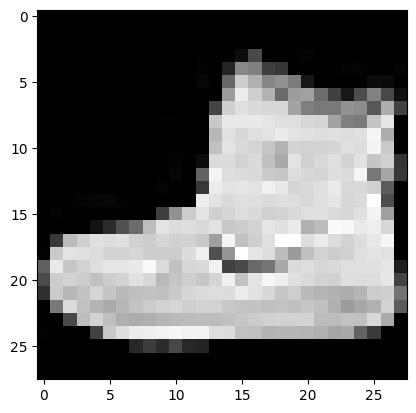

In [10]:
plt.imshow(x_train[0,], cmap="gray")

In [11]:
x_train, x_test = x_train/255.0, x_test/255.0

In [12]:
x_train.shape

(60000, 28, 28)

# Define Model

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile Model

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Fit Model

In [18]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 8s 4ms/step - loss: 0.7782 - accuracy: 0.7441 - val_loss: 0.5762 - val_accuracy: 0.7981
Epoch 2/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.5121 - accuracy: 0.8224 - val_loss: 0.4815 - val_accuracy: 0.8321
Epoch 3/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4632 - accuracy: 0.8372 - val_loss: 0.4887 - val_accuracy: 0.8284
Epoch 4/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4339 - accuracy: 0.8477 - val_loss: 0.4320 - val_accuracy: 0.8512
Epoch 5/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4142 - accuracy: 0.8539 - val_loss: 0.4169 - val_accuracy: 0.8548
Epoch 6/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3979 - accuracy: 0.8595 - val_loss: 0.4114 - val_accuracy: 0.8582
Epoch 7/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3842 - accuracy: 0.8651 - val_loss: 0.3891 - val_accuracy:

In [19]:
print(history.history)

{'loss': [0.7781959772109985, 0.5120547413825989, 0.4631861448287964, 0.4338909685611725, 0.41423705220222473, 0.39790254831314087, 0.3842480778694153, 0.37286654114723206, 0.3636375963687897, 0.3541699945926666, 0.3455052971839905, 0.33827221393585205, 0.33178290724754333, 0.3244374990463257, 0.3185332715511322, 0.3122965097427368, 0.3070126473903656, 0.3017245829105377, 0.29662376642227173, 0.2916449308395386, 0.2873973250389099, 0.2828257083892822, 0.27869799733161926, 0.27354565262794495, 0.26944419741630554, 0.2671425938606262, 0.2630579173564911, 0.2598467767238617, 0.2558249533176422, 0.2517949938774109, 0.24922887980937958, 0.2460208684206009, 0.24302034080028534, 0.23878638446331024, 0.2367554008960724, 0.2337811142206192, 0.23145337402820587, 0.22841964662075043, 0.22588267922401428, 0.22246459126472473, 0.22036609053611755, 0.21666574478149414, 0.2151830941438675, 0.21166522800922394, 0.20963960886001587, 0.20707882940769196, 0.20500127971172333, 0.2023371011018753, 0.200434

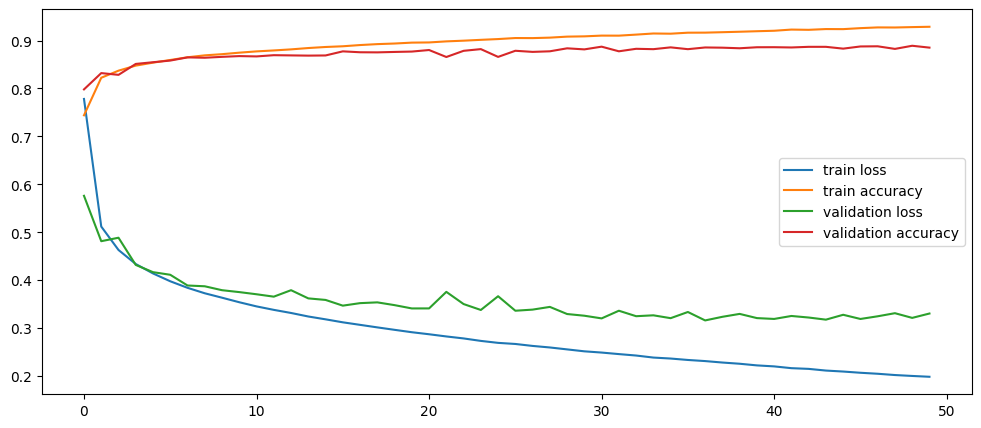

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [21]:
model.evaluate(x_test, y_test, verbose=0)

[0.3566446900367737, 0.8766999840736389]

In [22]:
x3 = x_test[1:3,:,:]
x3.shape

(2, 28, 28)

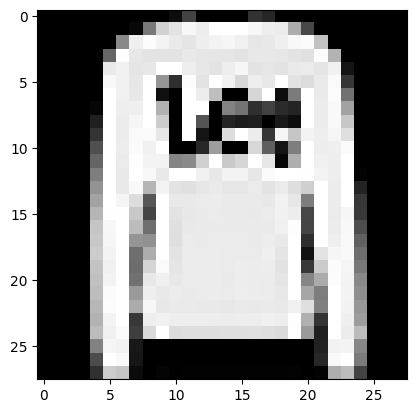

In [23]:
plt.imshow(x3[0], cmap="gray")

In [24]:
model.predict(x3).round(3)

1/1 [==============================] - 0s 74ms/step


array([[0.   , 0.   , 0.997, 0.   , 0.003, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [25]:
model.predict(x3).shape

1/1 [==============================] - 0s 16ms/step


(2, 10)

In [26]:
np.argmax(model.predict(x3).round(3), axis=1)

1/1 [==============================] - 0s 16ms/step


array([2, 1])

In [27]:
y_test[1:3]

array([2, 1], dtype=uint8)